# Assignment 2 [CITS5508] Machine Learning
### Stefan Nio [23104714]
### 15% Weighting, Due Friday, 3rd May 2024 (Extension Special Consideration u/ 10th May)


### 1. Outline
You will develop Python code for classification tasks. You will use Grid Search and crossvalidation to find the optimal hyperparameters of the model and discuss and interpret the different decisions and their impact on the model’s performance and interpretability.


### 2. Submission (Part II)
This .ipynb file is one (1) of two files to be submitted for Assignment 2. This file contains all the supporting code that generated all the plots, numbers, etc that is presented in Part I.

# 3. Dataset
In this assignment, you are asked to train a few decision tree classifiers on the Breast cancer
wisconsin (diagnostic) dataset available on Scikit-Learn and compare their performances.
Description about this dataset can be found on the Scikit-Learn web page:
https://scikit-learn.org/stable/datasets/toy dataset.html#breast-cancer-wisconsin-diagnostic-dataset


There are two classes in the dataset:
<ul>
    <li>malignant (212 instances, class value 0) and</li>
    <li>benign (357 instances, class value 1).</li>
</ul>

Follow the example code given on the web page
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load breast cancer.html#sklearn.datasets.
load breast cancer
to read the dataset and separate it into a feature matrix and a class vector. Your feature matrix
should have 569 (rows) × 30 (columns) and your class vector should have 569 elements.
In all asked implementations using Decision Trees, Random Forests or data splits (such as when
using train test split()), you should set random state as specified for results reproducibility. You should aim to round your results to the second decimal place.

### Import the necessary libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer(as_frame=True)

In [2]:
data.data.shape

(569, 30)

In [3]:
df = data.frame
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# D1

In [4]:
df = df.sort_index(axis=1)

In [5]:
df.columns

Index(['area error', 'compactness error', 'concave points error',
       'concavity error', 'fractal dimension error', 'mean area',
       'mean compactness', 'mean concave points', 'mean concavity',
       'mean fractal dimension', 'mean perimeter', 'mean radius',
       'mean smoothness', 'mean symmetry', 'mean texture', 'perimeter error',
       'radius error', 'smoothness error', 'symmetry error', 'target',
       'texture error', 'worst area', 'worst compactness',
       'worst concave points', 'worst concavity', 'worst fractal dimension',
       'worst perimeter', 'worst radius', 'worst smoothness', 'worst symmetry',
       'worst texture'],
      dtype='object')

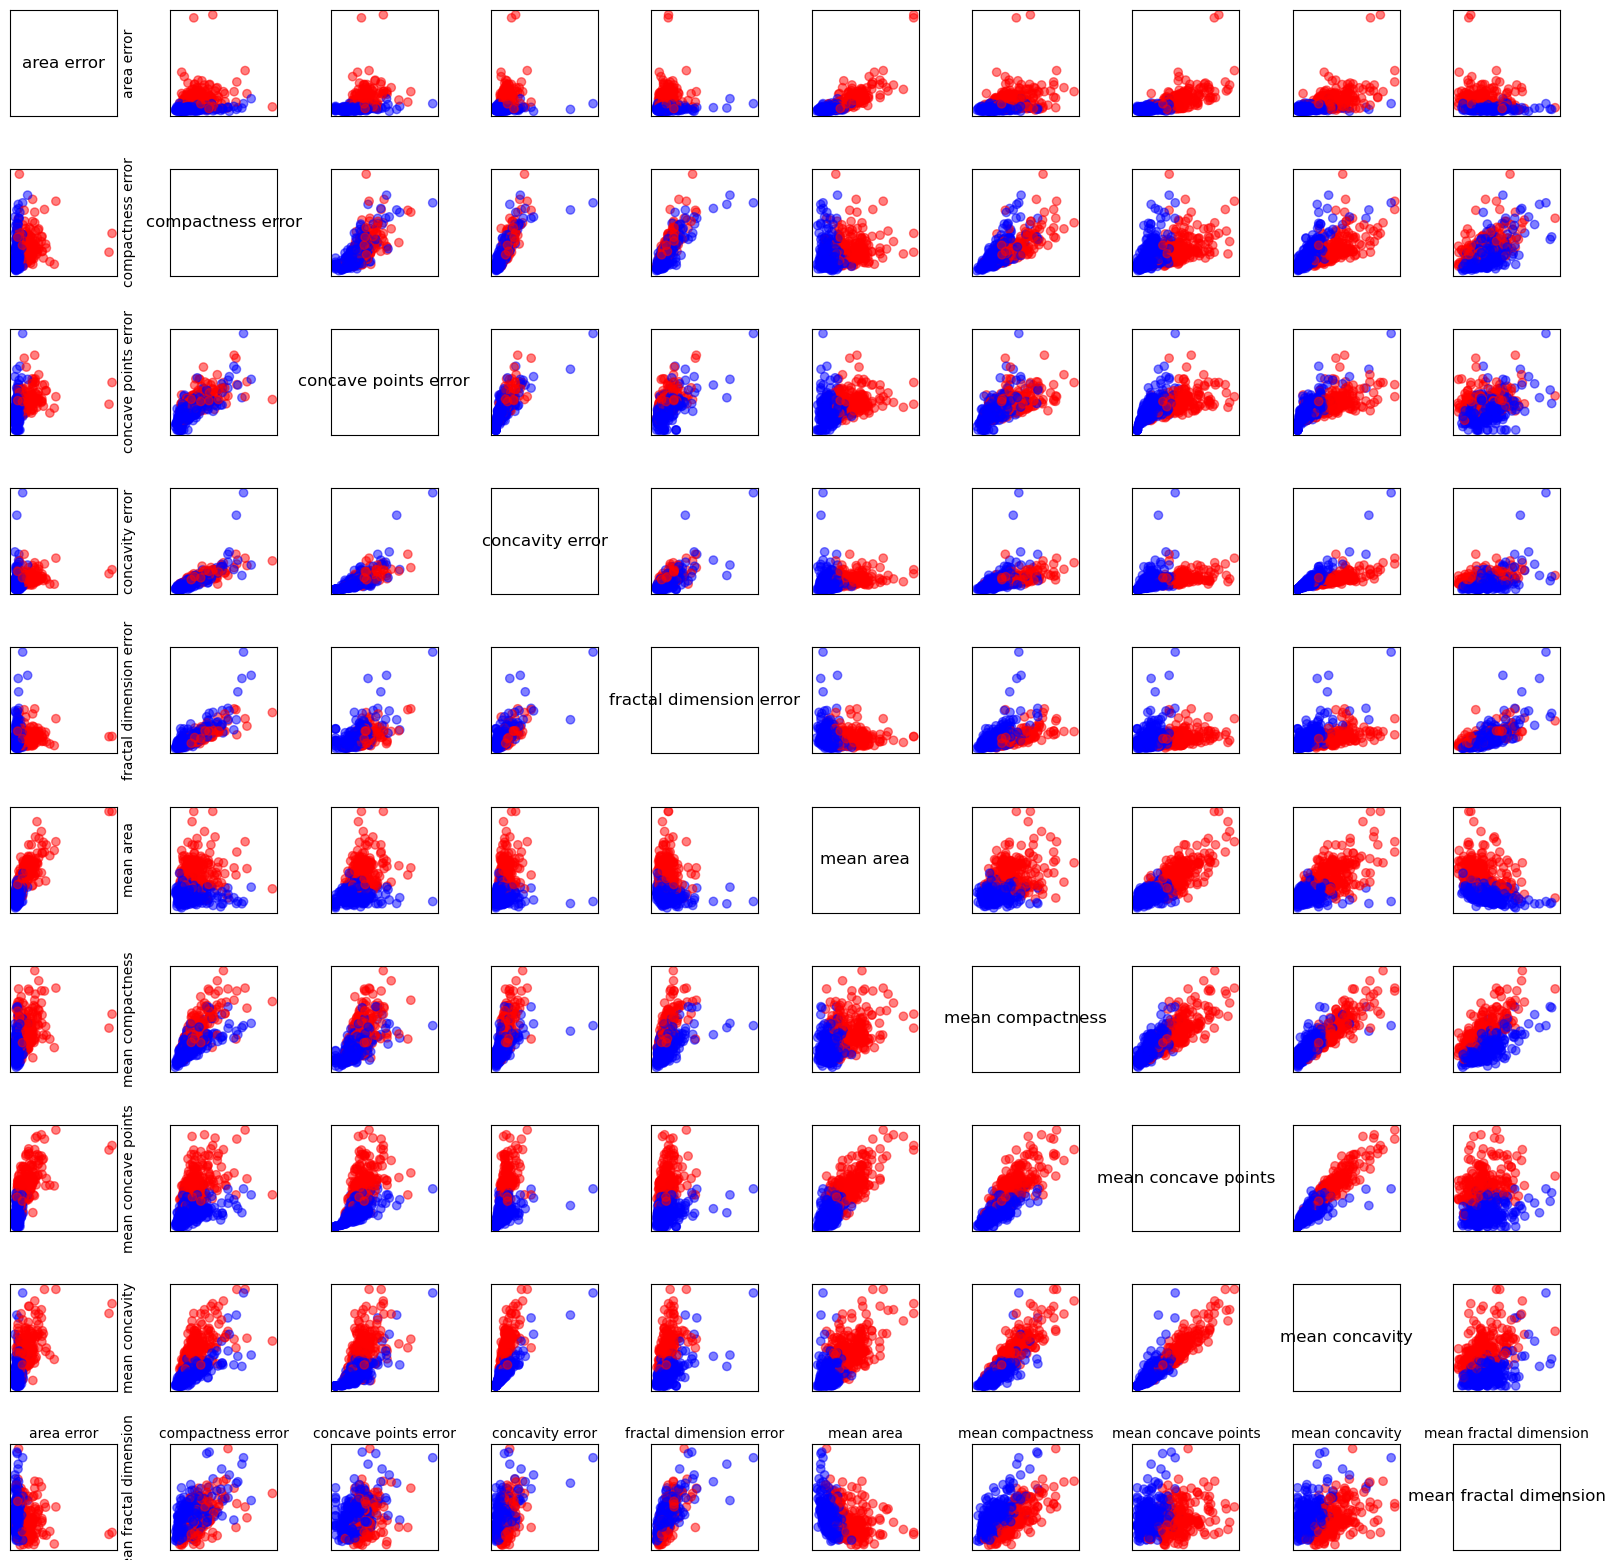

In [6]:
# Select the first 10 features
features = df.columns[:10]

# Create Plot
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

colors = ['red' if x == 0 else 'blue' for x in df['target']]

for i, feature_i in enumerate(features):
    for j, feature_j in enumerate(features):
        ax = axes[i, j]
        if i != j:
            ax.scatter(df[feature_j], df[feature_i], c=colors, alpha=0.5)
        else:
            ax.text(0.5, 0.5, feature_i, fontsize=12, ha='center', va='center')
        ax.set_xticks([])
        ax.set_yticks([])
        if i == 9:
            ax.set_xlabel(feature_j)
            ax.xaxis.set_label_position('top') 
        if j == 0:
            ax.set_ylabel(feature_i)
            ax.yaxis.set_label_position('right')

plt.show()


# D2

In [7]:
correlation_matrix = df.corr()
correlation_matrix

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
area error,1.000000,0.284840,0.415730,0.270895,0.127071,0.800086,0.455653,0.690299,0.617427,-0.090170,...,0.811408,0.283257,0.538166,0.385100,0.017539,0.761213,0.757373,0.125389,0.074126,0.196497
compactness error,0.284840,1.000000,0.744083,0.801268,0.803269,0.212583,0.738722,0.490424,0.670279,0.559837,...,0.199371,0.678780,0.483208,0.639147,0.590973,0.260516,0.204607,0.227394,0.277878,0.143003
concave points error,0.415730,0.744083,1.000000,0.771804,0.611044,0.372320,0.642262,0.615634,0.683260,0.341198,...,0.342271,0.452888,0.602450,0.549592,0.310655,0.394999,0.358127,0.215351,0.143116,0.086741
concavity error,0.270895,0.801268,0.771804,1.000000,0.727372,0.207660,0.570517,0.439167,0.691270,0.446630,...,0.188353,0.484858,0.440472,0.662564,0.439329,0.226680,0.186904,0.168481,0.197788,0.100241
fractal dimension error,0.127071,0.803269,0.611044,0.727372,1.000000,-0.019887,0.507318,0.257584,0.449301,0.688132,...,-0.022736,0.390159,0.215204,0.379975,0.591328,-0.001000,-0.037488,0.170568,0.111094,-0.003195
mean area,0.800086,0.212583,0.372320,0.207660,-0.019887,1.000000,0.498502,0.823269,0.685983,-0.283110,...,0.959213,0.390410,0.722017,0.512606,0.003738,0.959120,0.962746,0.123523,0.143570,0.287489
mean compactness,0.455653,0.738722,0.642262,0.570517,0.507318,0.498502,1.000000,0.831135,0.883121,0.565369,...,0.509604,0.865809,0.815573,0.816275,0.687382,0.590210,0.535315,0.565541,0.510223,0.248133
mean concave points,0.690299,0.490424,0.615634,0.439167,0.257584,0.823269,0.831135,1.000000,0.921391,0.166917,...,0.809630,0.667454,0.910155,0.752399,0.368661,0.855923,0.830318,0.452753,0.375744,0.292752
mean concavity,0.617427,0.670279,0.683260,0.691270,0.449301,0.685983,0.883121,0.921391,1.000000,0.336783,...,0.675987,0.754968,0.861323,0.884103,0.514930,0.729565,0.688236,0.448822,0.409464,0.299879
mean fractal dimension,-0.090170,0.559837,0.341198,0.446630,0.688132,-0.283110,0.565369,0.166917,0.336783,1.000000,...,-0.231854,0.458798,0.175325,0.346234,0.767297,-0.205151,-0.253691,0.504942,0.334019,-0.051269


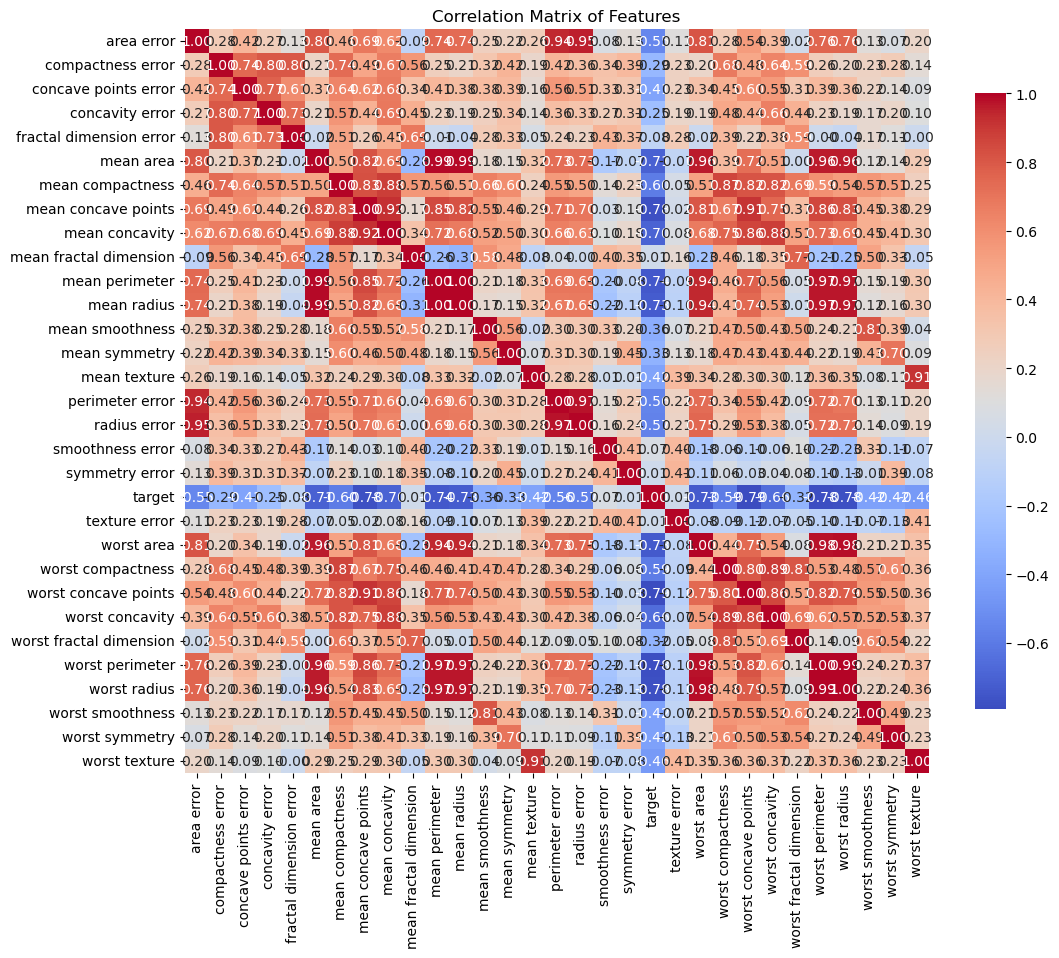

In [8]:
# Set up the matplotlib heatmap
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            cbar_kws={'shrink': .8}, square=True)

plt.title('Correlation Matrix of Features')
plt.show()

# D5

In [9]:
# Print current column names
print(df.columns.tolist())

['area error', 'compactness error', 'concave points error', 'concavity error', 'fractal dimension error', 'mean area', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'mean perimeter', 'mean radius', 'mean smoothness', 'mean symmetry', 'mean texture', 'perimeter error', 'radius error', 'smoothness error', 'symmetry error', 'target', 'texture error', 'worst area', 'worst compactness', 'worst concave points', 'worst concavity', 'worst fractal dimension', 'worst perimeter', 'worst radius', 'worst smoothness', 'worst symmetry', 'worst texture']


In [10]:
# List of features to be dropped
features_to_drop = ['mean perimeter', 'mean radius', 'worst radius', 'worst perimeter', 'radius error']

# Drop the specified features
df = df.drop(columns=[col for col in features_to_drop if col in df.columns])

# Verify remaining columns
print(df.columns)

Index(['area error', 'compactness error', 'concave points error',
       'concavity error', 'fractal dimension error', 'mean area',
       'mean compactness', 'mean concave points', 'mean concavity',
       'mean fractal dimension', 'mean smoothness', 'mean symmetry',
       'mean texture', 'perimeter error', 'smoothness error', 'symmetry error',
       'target', 'texture error', 'worst area', 'worst compactness',
       'worst concave points', 'worst concavity', 'worst fractal dimension',
       'worst smoothness', 'worst symmetry', 'worst texture'],
      dtype='object')


In [11]:
print("Updated DataFrame shape:", df.shape)

Updated DataFrame shape: (569, 26)


# D6

In [12]:
X = df.drop(columns='target')
y = df['target']

In [13]:
from sklearn.model_selection import train_test_split

# Split the data - 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5508)

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=5508)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5508)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Make predictions on both the training set and the test set
y_train_pred = tree_clf.predict(X_train)
y_test_pred = tree_clf.predict(X_test)

# Calculate accuracy, precision, and recall for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

# Calculate accuracy, precision, and recall for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

# Compute the confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print("Confusion Matrix on Test Set:\n", test_conf_matrix)

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Test Accuracy: 0.96
Test Precision: 0.97
Test Recall: 0.97
Confusion Matrix on Test Set:
 [[39  2]
 [ 2 71]]


# D8

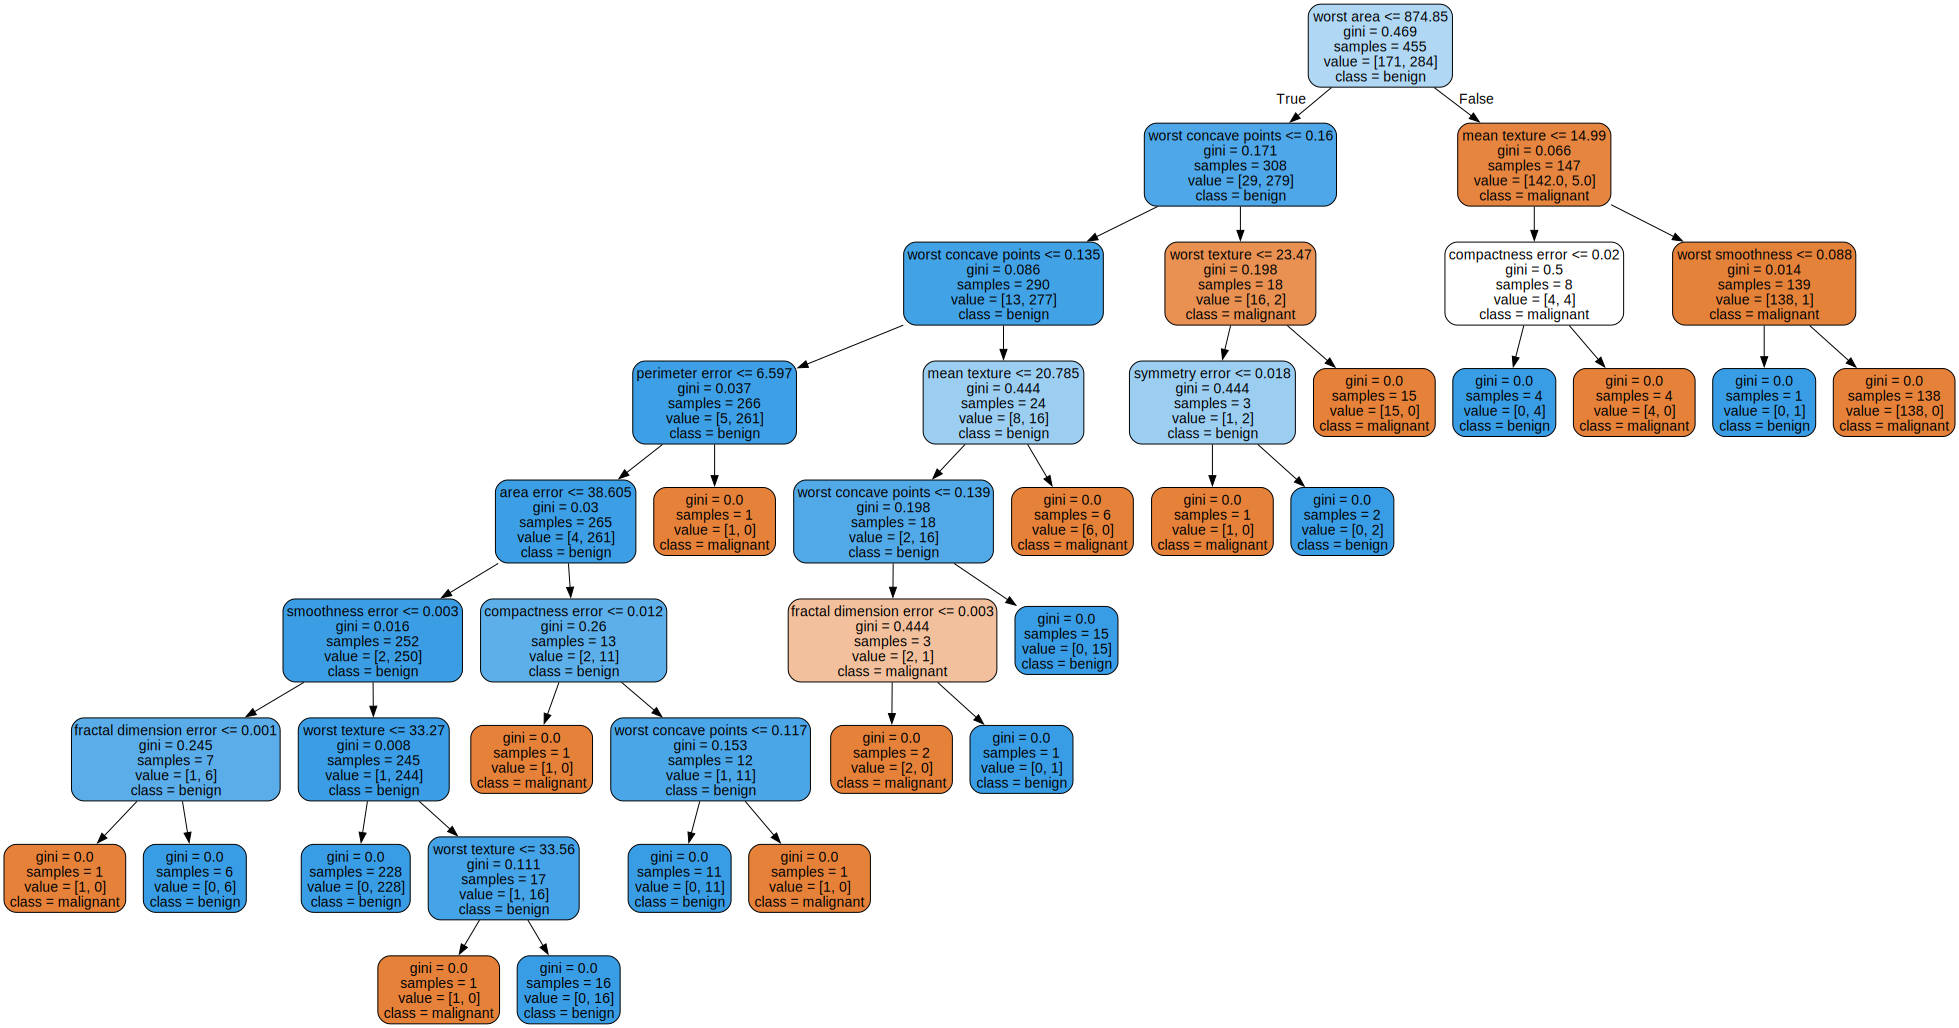

In [16]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT format object
dot_data = export_graphviz(
    tree_clf,
    out_file=None,  
    feature_names=X.columns,
    class_names=['malignant', 'benign'],
    rounded=True,
    filled=True
)

# Display the decision tree
graph = graphviz.Source(dot_data)
graph.render("Breast_Cancer_Tree")  # Saves the tree to a file
graph  # Displays the tree here in Jupyter

# D10

In [17]:
# Lis of states for different splits
random_states = [5508, 5509, 5510, 5511, 5512]

# Lists to store scores
accuracies = []
precisions = []
recalls = []

In [18]:
# Iterate over each random state
for seed in random_states:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    # Initialize and fit the Decision Tree
    tree_clf = DecisionTreeClassifier(random_state=5508)
    tree_clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_test_pred = tree_clf.predict(X_test)
    
    # Calculate and store the metrics
    accuracies.append(accuracy_score(y_test, y_test_pred))
    precisions.append(precision_score(y_test, y_test_pred))
    recalls.append(recall_score(y_test, y_test_pred))


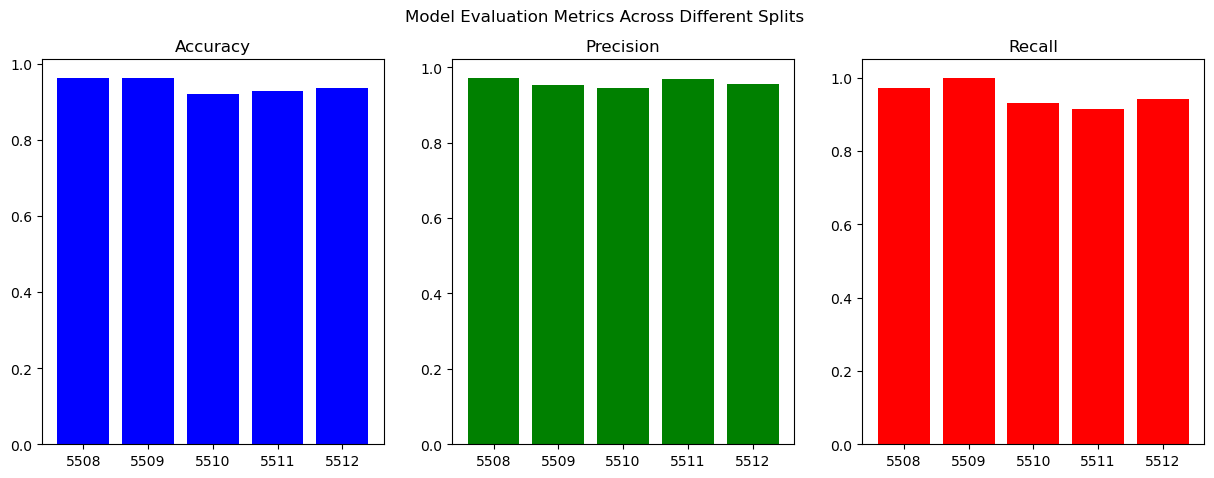

In [19]:
# Setting up the plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Model Evaluation Metrics Across Different Splits')

# Accuracy plot
axs[0].bar(range(len(random_states)), accuracies, color='blue')
axs[0].set_title('Accuracy')
axs[0].set_xticks(range(len(random_states)))
axs[0].set_xticklabels(random_states)

# Precision plot
axs[1].bar(range(len(random_states)), precisions, color='green')
axs[1].set_title('Precision')
axs[1].set_xticks(range(len(random_states)))
axs[1].set_xticklabels(random_states)

# Recall plot
axs[2].bar(range(len(random_states)), recalls, color='red')
axs[2].set_title('Recall')
axs[2].set_xticks(range(len(random_states)))
axs[2].set_xticklabels(random_states)

plt.show()

# D11

In [20]:
# Training and testing splits
splits = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2), (0.9, 0.1)]

# Lists to store scores
accuracies = []
precisions = []
recalls = []

In [21]:
# Iterate over each split configuration
for train_size, test_size in splits:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=5508)
    
    # Initialize and fit the Decision Tree
    tree_clf = DecisionTreeClassifier(random_state=5508)
    tree_clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_test_pred = tree_clf.predict(X_test)
    
    # Calculate and store the metrics
    accuracies.append(accuracy_score(y_test, y_test_pred))
    precisions.append(precision_score(y_test, y_test_pred))
    recalls.append(recall_score(y_test, y_test_pred))

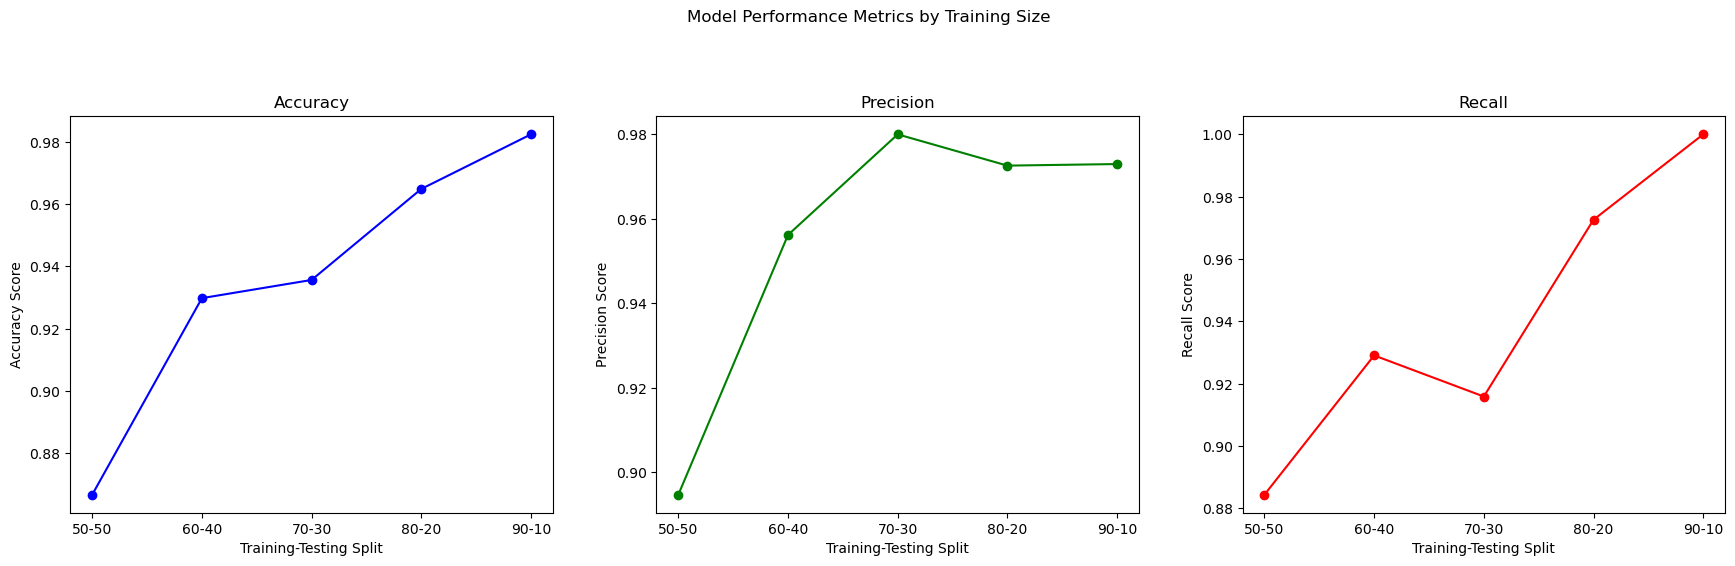

In [22]:
# Setting up the plots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Model Performance Metrics by Training Size')

training_sizes = ['50-50', '60-40', '70-30', '80-20', '90-10']

# Accuracy plot
axs[0].plot(training_sizes, accuracies, marker='o', linestyle='-', color='blue')
axs[0].set_title('Accuracy')
axs[0].set_xlabel('Training-Testing Split')
axs[0].set_ylabel('Accuracy Score')

# Precision plot
axs[1].plot(training_sizes, precisions, marker='o', linestyle='-', color='green')
axs[1].set_title('Precision')
axs[1].set_xlabel('Training-Testing Split')
axs[1].set_ylabel('Precision Score')

# Recall plot
axs[2].plot(training_sizes, recalls, marker='o', linestyle='-', color='red')
axs[2].set_title('Recall')
axs[2].set_xlabel('Training-Testing Split')
axs[2].set_ylabel('Recall Score')

plt.tight_layout(pad=3.0)
plt.show()

# Fitting a Decision Tree model with optimal hyperparameters

# D12

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the model
tree_clf = DecisionTreeClassifier(random_state=5508)

# Define the parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 5, 10],
    'min_samples_leaf': [2, 5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(tree_clf, param_grid, cv=10, scoring='accuracy', return_train_score=True)

In [24]:
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_tree = grid_search.best_estimator_

In [25]:
# Predictions on training set
y_train_pred = best_tree.predict(X_train)

# Predictions on test set
y_test_pred = best_tree.predict(X_test)

# Evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print results
print("Optimal Hyperparameters:", best_params)
print("Training Accuracy: {:.2f}".format(train_accuracy))
print("Training Precision: {:.2f}".format(train_precision))
print("Training Recall: {:.2f}".format(train_recall))
print("Test Accuracy: {:.2f}".format(test_accuracy))
print("Test Precision: {:.2f}".format(test_precision))
print("Test Recall: {:.2f}".format(test_recall))
print("Confusion Matrix on Test Set:\n", test_conf_matrix)

Optimal Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
Training Accuracy: 0.98
Training Precision: 0.98
Training Recall: 0.99
Test Accuracy: 0.98
Test Precision: 0.97
Test Recall: 1.00
Confusion Matrix on Test Set:
 [[20  1]
 [ 0 36]]


# D14

In [26]:
scoring_metrics = ['accuracy', 'precision', 'recall']
results = {}

for metric in scoring_metrics:
    # Set up and perform GridSearchCV
    grid_search = GridSearchCV(tree_clf, param_grid, cv=10, scoring=metric, return_train_score=True)
    grid_search.fit(X_train, y_train)
    
    # Store best model and parameters
    best_params = grid_search.best_params_
    best_tree = grid_search.best_estimator_
    
    # Retrain the model
    best_tree.fit(X_train, y_train)
    y_test_pred = best_tree.predict(X_test)
    
    # Store results
    results[metric] = {
        'best_params': best_params,
        'confusion_matrix': confusion_matrix(y_test, y_test_pred)
    }


In [27]:
for metric, data in results.items():
    print(f"Results for {metric} optimization:")
    print("Optimal Hyperparameters:", data['best_params'])
    print("Confusion Matrix on Test Set:\n", data['confusion_matrix'])
    print("\n")


Results for accuracy optimization:
Optimal Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
Confusion Matrix on Test Set:
 [[20  1]
 [ 0 36]]


Results for precision optimization:
Optimal Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
Confusion Matrix on Test Set:
 [[20  1]
 [ 0 36]]


Results for recall optimization:
Optimal Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Confusion Matrix on Test Set:
 [[20  1]
 [ 0 36]]




# Fitting a Decision Tree with optimal hyperparameters and a reduced feature set

# D15

In [28]:
tree_clf = DecisionTreeClassifier(random_state=5508)
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 5, 10],
    'min_samples_leaf': [2, 5]
}
grid_search = GridSearchCV(tree_clf, param_grid, cv=10, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_
best_params = grid_search.best_params_

In [29]:
best_tree

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                       random_state=5508)

In [30]:
# Get feature importances
importances = best_tree.feature_importances_

features = X.columns
feature_importances = pd.DataFrame(importances, index=features, columns=['Importance'])
sorted_feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(sorted_feature_importances)

                         Importance
worst area                 0.748824
worst concave points       0.143093
mean texture               0.062915
mean concavity             0.023274
worst texture              0.010108
mean area                  0.008410
concavity error            0.003376
mean compactness           0.000000
worst symmetry             0.000000
worst smoothness           0.000000
worst fractal dimension    0.000000
worst concavity            0.000000
concave points error       0.000000
worst compactness          0.000000
texture error              0.000000
symmetry error             0.000000
smoothness error           0.000000
perimeter error            0.000000
compactness error          0.000000
mean symmetry              0.000000
mean smoothness            0.000000
mean fractal dimension     0.000000
fractal dimension error    0.000000
mean concave points        0.000000
area error                 0.000000


# D16

In [31]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(best_tree, threshold=0.01, prefit=True)
X_reduced = selector.transform(X)

# Get retained feature names
retained_features = X.columns[selector.get_support()]

# Report retained features
print("Retained Features:", retained_features.tolist())

# Calculate retained feature importance
retained_importances = sorted_feature_importances.loc[retained_features, 'Importance']
print("Removed Features:\n", sorted_feature_importances.drop(retained_features))

# Calculate and report the total feature importance retained
total_importance_retained = retained_importances.sum()
print("Total Feature Importance Retained:", total_importance_retained)

Retained Features: ['mean concavity', 'mean texture', 'worst area', 'worst concave points', 'worst texture']
Removed Features:
                          Importance
mean area                  0.008410
concavity error            0.003376
mean compactness           0.000000
worst symmetry             0.000000
worst smoothness           0.000000
worst fractal dimension    0.000000
worst concavity            0.000000
concave points error       0.000000
worst compactness          0.000000
texture error              0.000000
symmetry error             0.000000
smoothness error           0.000000
perimeter error            0.000000
compactness error          0.000000
mean symmetry              0.000000
mean smoothness            0.000000
mean fractal dimension     0.000000
fractal dimension error    0.000000
mean concave points        0.000000
area error                 0.000000
Total Feature Importance Retained: 0.9882138204819662


/Users/stefn/miniconda3/envs/cits5508-2024/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


# D17

In [32]:
# Convert reduced feature set back to DataFrame
X_reduced_df = pd.DataFrame(X_reduced, columns=X.columns[selector.get_support()])

In [33]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced_df, y, test_size=0.2, random_state=5508)

In [34]:
# Retrain with reduced features
best_tree_red = DecisionTreeClassifier(**best_params, random_state=5508)
best_tree_red.fit(X_train_red, y_train_red)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                       random_state=5508)

In [35]:
# Evaluate on reduced features
y_pred_train_red = best_tree_red.predict(X_train_red)
y_pred_test_red = best_tree_red.predict(X_test_red)

# Evaluation metrics for reduced feature set
accuracy_red = accuracy_score(y_test_red, y_pred_test_red)
precision_red = precision_score(y_test_red, y_pred_test_red)
recall_red = recall_score(y_test_red, y_pred_test_red)
conf_matrix_red = confusion_matrix(y_test_red, y_pred_test_red)

# Evaluate on full features
y_pred_train_full = best_tree.predict(X_train)
y_pred_test_full = best_tree.predict(X_test)

# Evaluation metrics for full feature set
accuracy_full = accuracy_score(y_test, y_pred_test_full)
precision_full = precision_score(y_test, y_pred_test_full)
recall_full = recall_score(y_test, y_pred_test_full)
conf_matrix_full = confusion_matrix(y_test, y_pred_test_full)

# Print results
print("Performance with Reduced Features:")
print(f"Accuracy: {accuracy_red}, Precision: {precision_red}, Recall: {recall_red}")
print("Confusion Matrix:\n", conf_matrix_red)

print("\nPerformance with Full Features:")
print(f"Accuracy: {accuracy_full}, Precision: {precision_full}, Recall: {recall_full}")
print("Confusion Matrix:\n", conf_matrix_full)

Performance with Reduced Features:
Accuracy: 0.9649122807017544, Precision: 0.9726027397260274, Recall: 0.9726027397260274
Confusion Matrix:
 [[39  2]
 [ 2 71]]

Performance with Full Features:
Accuracy: 0.9824561403508771, Precision: 0.972972972972973, Recall: 1.0
Confusion Matrix:
 [[20  1]
 [ 0 36]]


# Fitting a Random Forest

# D19

In [36]:
from sklearn.ensemble import RandomForestClassifier
# Define the RandomForest model
rf_clf = RandomForestClassifier(random_state=5508)

param_grid = {
    'n_estimators': [10, 20, 50, 100, 1000],
    'max_depth': [2, 3, 4, 5]
}

grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=10, scoring='accuracy')

In [37]:
# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

In [38]:
# Predictions on training set
y_train_pred_rf = best_rf.predict(X_train)

# Predictions on test set
y_test_pred_rf = best_rf.predict(X_test)

# Evaluation metrics
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)

test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)

test_conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

# Print results
print("Optimal Hyperparameters:", best_params_rf)
print("Training Accuracy: {:.2f}".format(train_accuracy_rf))
print("Training Precision: {:.2f}".format(train_precision_rf))
print("Training Recall: {:.2f}".format(train_recall_rf))
print("Test Accuracy: {:.2f}".format(test_accuracy_rf))
print("Test Precision: {:.2f}".format(test_precision_rf))
print("Test Recall: {:.2f}".format(test_recall_rf))
print("Confusion Matrix on Test Set:\n", test_conf_matrix_rf)


Optimal Hyperparameters: {'max_depth': 5, 'n_estimators': 1000}
Training Accuracy: 0.99
Training Precision: 0.99
Training Recall: 1.00
Test Accuracy: 0.98
Test Precision: 0.97
Test Recall: 1.00
Confusion Matrix on Test Set:
 [[20  1]
 [ 0 36]]
